# Assignment 3
## Decision Trees and Random Forests for Regression, Part 1

### About this notebook

The general description and instructions as well as questions for the walk through Part 1 of the task (this notebook) are found in the Assignment description in Canvas!


In [1]:
# YOU DON'T HAVE TO RUN THIS IF EVERYTHING IS ALREADY INSTALLED CORRECTLY
!pip3 install --upgrade pip
!pip3 install graphviz
!pip3 install dtreeviz
!pip3 install numpy scipy

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\eajgu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Steps 0-2: Dataset(s)

**Step 0:** First, load the dataset. Ultimately, you should be working with the California housing data, but for quicker test runs, it might help to first start out with the Diabetes data.

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from ConceptDataRegr import ConceptDataRegr
from sklearn.model_selection import train_test_split 

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

test_case = 'diabetes'
#test_case = 'california'

if test_case == 'california':
    dataset = fetch_california_housing()
elif test_case == 'diabetes':
    dataset = load_diabetes()
else:
    raise ValueError('Unknown test case')

X = dataset.data
y = dataset.target


**Step 1:** Get some information about the dataset you're looking at

In [3]:
if test_case == 'california' :
    print("target:", list(dataset.target_names))
print("features:", list(dataset.feature_names))
print("description:", dataset.DESCR)


features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level


**Step 2:** Split the data into train, validation and test sets.

In [4]:
# splitting using the proper SKLearn tools
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

## Step 3: The SKLearn Decision Tree Regressor

Set up and fit a DecisionTreeRegressor with *random_state=0* ([DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree)), use its *score* method to evaluate it in a simple step. Check also out [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
to learn about a different type of evaluation tool. Use the documentation where needed. Be prepared to answer "random" questions posed by the TA. 

In [5]:
from sklearn.tree import DecisionTreeRegressor

# set up your first regressor, e.g.: regressor1 = ...

regressor1 = DecisionTreeRegressor(random_state=0)



# train_score = 1 is a perfect fit

In [6]:
from sklearn.model_selection import cross_val_score
# apply cross_val_score on your regressor1 (obs, this is done on training data) and see what happens
# go for cv=10 for a start, but you can also test different values

cross_val = cross_val_score(regressor1, X_train, y_train,cv = 10)
print(cross_val)


[-0.02144221  0.0614295   0.09449354 -0.05130063  0.36838284 -0.55354206
 -0.00447535 -0.14397523  0.25445472  0.12892033]


In [7]:
# fit your regressor1 to training data and evaluate with 'score' on the test data

regressor1.fit(X_train,y_train)

train_score  = regressor1.score(X_test, y_test)

train_score


-0.057750608640022794

## Step 4: Decision Tree Parameters
Now, work with two parameters, *max_depth* and *min_samples_leaf*. Analyse the documentation to understand what they do. Create two more regressors, where you experiment with different settings for those parameters, e.g. 1 for *max_depth* and 20 for *min_samples_leaf*. Evaluate with both *cross_val_score* and *score*.
Explain the outcomes.

In [8]:
# regressor2...
regressor2 = DecisionTreeRegressor(random_state=0, max_depth=1, min_samples_leaf=20)
regressor2.fit(X_train,y_train)
cross_val2 = cross_val_score(regressor2, X_train, y_train,cv = 10)
print(cross_val2)

train_score2 = regressor2.score(X_test, y_test)
print(train_score2)

[ 0.06376428  0.14919576 -0.01133969  0.06887429  0.25102598  0.15290758
  0.28438258  0.24414713  0.24351975  0.20996688]
0.12280882071603205


In [9]:
# regressor3 ...
regressor3 = DecisionTreeRegressor(random_state=0, max_depth=4, min_samples_leaf=9)
regressor3.fit(X_train,y_train)
cross_val3 = cross_val_score(regressor3, X_train, y_train,cv = 10)
print(cross_val3)

train_score3 = regressor3.score(X_test, y_test)
print(train_score3)

[0.38147387 0.48900701 0.4292131  0.08498345 0.60544347 0.25688293
 0.54412727 0.32832264 0.21623922 0.54706896]
0.1641073720224724


## Steps 5-6: Decision Tree Visualization

The next cells give examples how to visualize regressor2 and regressor3.

**Step 5:** Visualisation with GraphViz, which was used for the lecture slides, but with rectangular nodes

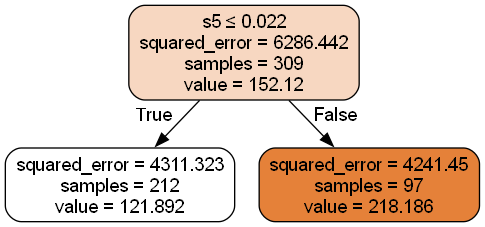

In [10]:
from sklearn import tree
import graphviz
from IPython.display import Image

# The visualisation below assumes a regressor called 'regressor2'. 
# Change in the code below if your naming above is different

dot_data = tree.export_graphviz(regressor2, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor2")
Image("decision_tree_regressor2.png")

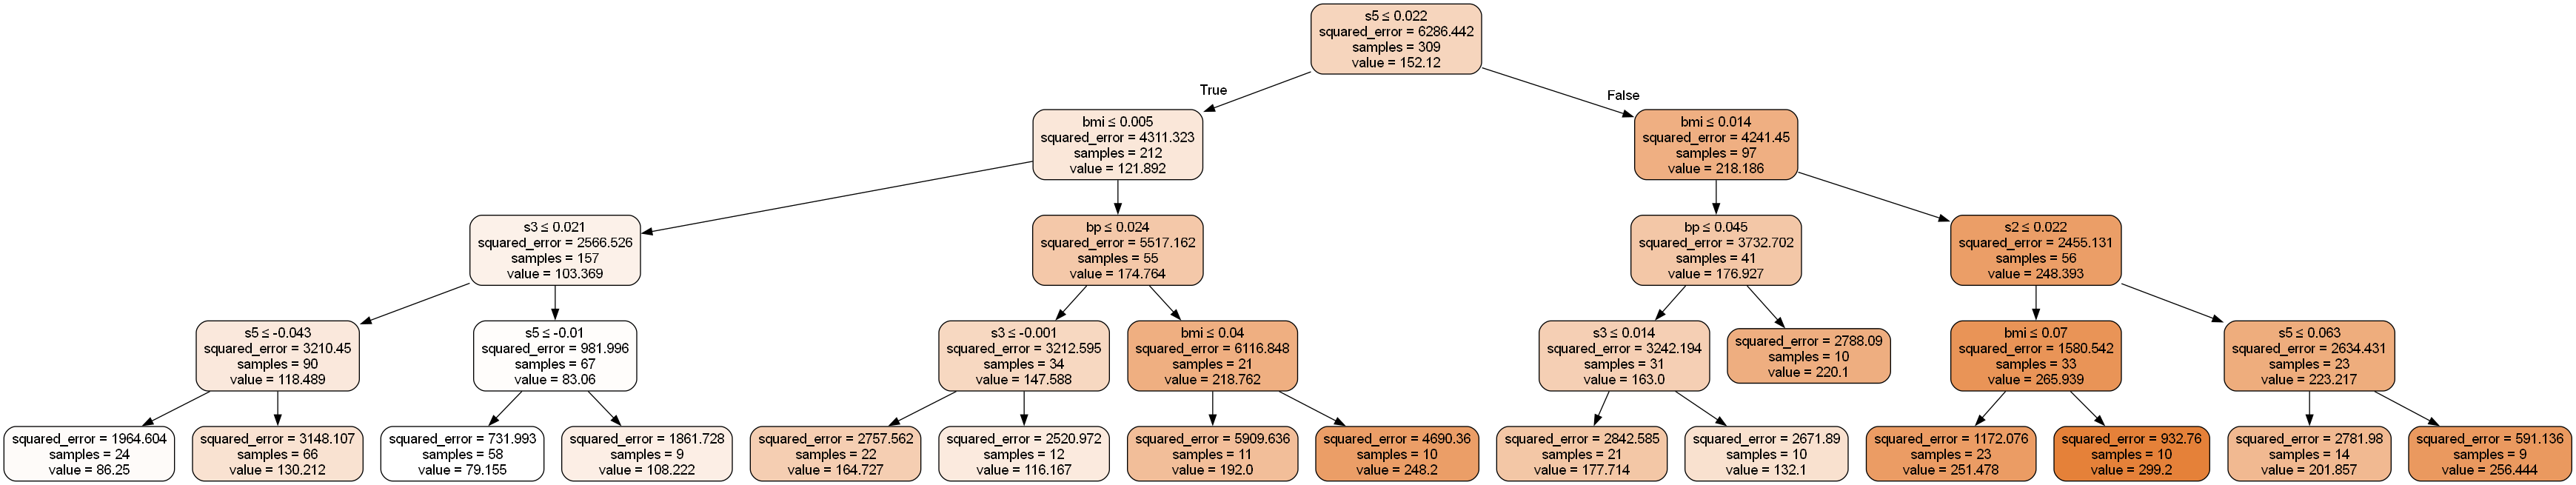

In [11]:
# The visualisation below assumes a regressor called 'regressor3'. 
# Change in the code below if your naming above is different

dot_data = tree.export_graphviz(regressor3, feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor3")
Image("decision_tree_regressor3.png")

**Step 6:** Another way to visualize the decision trees is to use dtreeviz. To make these plots it takes quite some time, so we recommend to use this visualization tool for trees with few nodes only. 

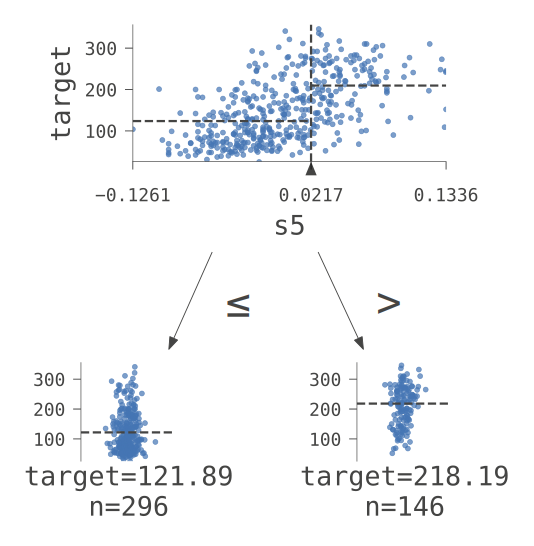

In [12]:
import dtreeviz

# The visualisation below assumes a regressor called 'regressor2'. 
# Change in the code below if your naming above is different

viz = dtreeviz.model(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names)

viz.view(fontname="monospace", scale=3) # this displays the output inside the notebook.


# If you want to store the output in a file use:
#viz.save("dtreeviz.svg")


## Steps 7-9: Explainability

**Step 7:** If you want to visualize (explain) the decision path for one prediction, you can also use dtreeviz:

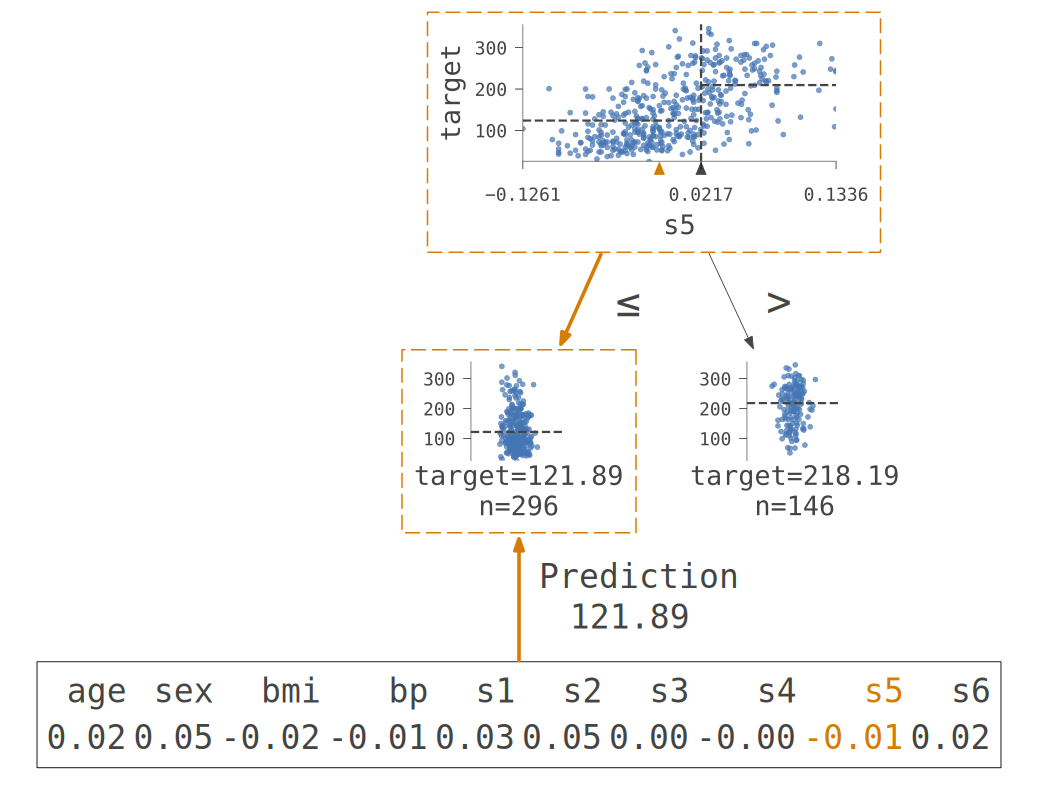

In [13]:
import numpy as np

# The visualisation below assumes a regressor called 'regressor2'. 
# Change in the code below if your naming above is different

sample = X_test[np.random.randint(0, len(X_test)),:] # random sample from training

viz = dtreeviz.model(regressor2, X, y,
                target_name="target",
                feature_names=dataset.feature_names)

viz.view(fontname="monospace", scale=3, x = sample)

**Step 8:** For bigger graphs you just show the decision path

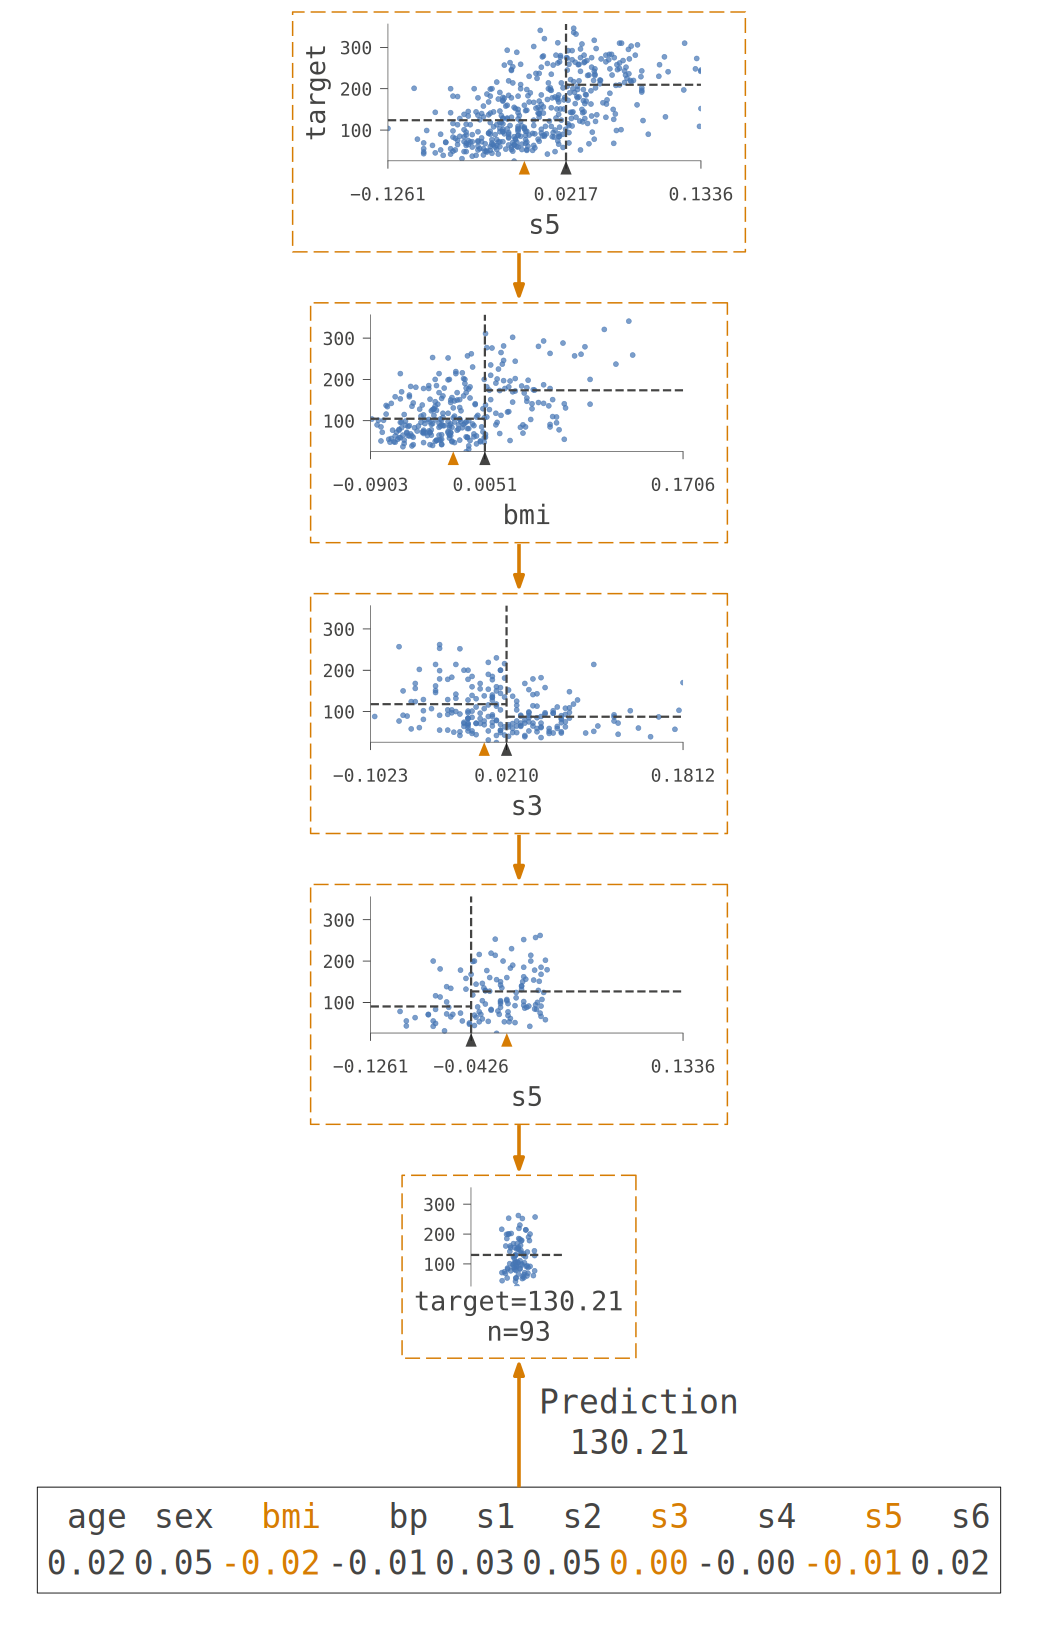

In [14]:
# The visualisation below assumes a regressor called 'regressor3'. 
# Change in the code below if your naming above is different

viz = dtreeviz.model(regressor3, X, y,
                target_name="target",
                feature_names=dataset.feature_names)
#viz.view()
viz.view(fontname="monospace", scale=3, x=sample, show_just_path=True)

**Step 9:** Another option to explain the prediction for big trees is this

In [15]:


# The call below assumes a regressor called 'regressor3'. 
# Change in the code below if your naming above is different

print(viz.explain_prediction_path(sample))

bmi < 0.01
s3 < 0.02
-0.04 <= s5  < 0.02



## Step 10: Random Forests

Create a *RandomForestRegressor*, e.g. for 5 or 10 trees, and experiment with different parameters for it (explore the documentation!). Test at least two different parameter sets (evaluate with *score*) and discuss the outcomes.

In [19]:
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 5
# Parameter Set 1
forest = RandomForestRegressor(n_estimators=5, max_depth=3, random_state=0)
forest.fit(X_train, y_train)

train_score_rf1 = forest.score(X_test, y_test)

rf2 = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_leaf=5, random_state=0)
rf2.fit(X_train, y_train)

train_score_rf2 = rf2.score(X_test, y_test)

print(train_score_rf1)
print(train_score_rf2)


0.21508366027752746
0.25150704084812936


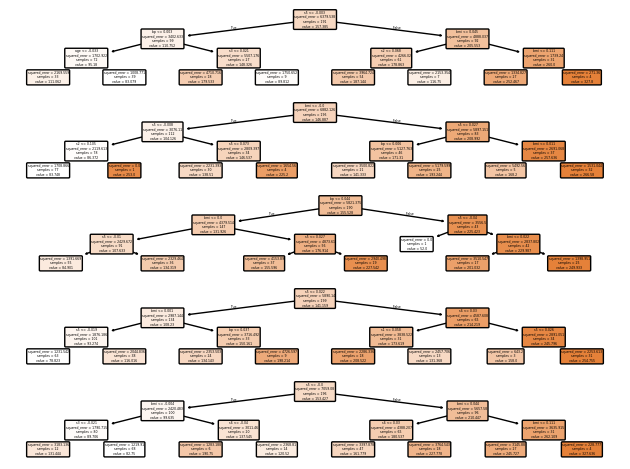

In [21]:
# You can visualise the trees as above - but maybe not more than 5 and not the really big ones ;-)

# The visualisation below assumes a random forest called 'forest' and a parameter 'number_of_trees'. 
# Change in the code below if your naming above is different

from matplotlib import pyplot as plt


for treeid in range(number_of_trees):
    dot_data = tree.export_graphviz(forest.estimators_[treeid], feature_names=dataset.feature_names, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data, format="png") 
    graph.render("forest_treeid"+str(treeid))

fig, ax = plt.subplots(number_of_trees,1) # use plt.subplots(number_of_trees/2,2) if you want two columns
for i, axi in enumerate(ax.flat):
    axi.set_title("Tree {}".format(i))
    tree.plot_tree(forest.estimators_[i], ax=axi, feature_names=dataset.feature_names, filled=True, rounded=True)
fig.tight_layout()